<a href="https://colab.research.google.com/github/Shriansh16/NLP/blob/main/twitter_sentiment_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
!unzip '/content/archive (25).zip'

Archive:  /content/archive (25).zip
  inflating: Twitter_Data.csv        


In [3]:
df=pd.read_csv('/content/Twitter_Data.csv')

In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<Axes: >

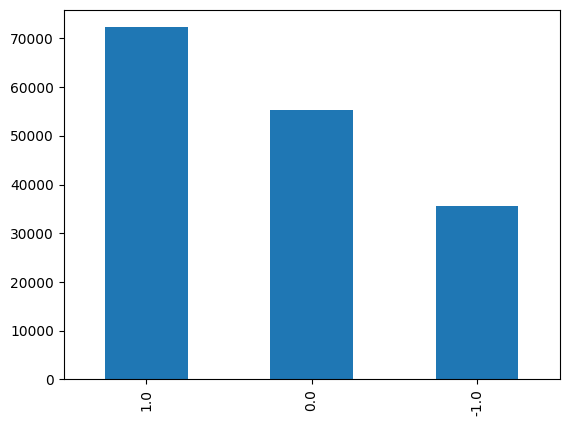

In [10]:
df['category'].value_counts().plot(kind='bar')

In [12]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
pstem=PorterStemmer()

In [14]:
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
def preprocess_text(text):
  text=re.sub('[^A-Za-z]',' ',text)
  text=text.lower()
  words=nltk.word_tokenize(text)
  words1=[pstem.stem(word) for word in words if word not in stopwords.words('english')]
  return ' '.join(words1)




In [21]:
df['preprocess_tweets']=df['clean_text'].apply(preprocess_text)

In [22]:
df.head()

,clean_text,category,preprocess_tweets
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


In [23]:
import gensim
from gensim.models import KeyedVectors

In [24]:
import gensim.downloader as api

In [26]:
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [27]:
wv.key_to_index

{'</s>': 0,
 'in': 1,
 'for': 2,
 'that': 3,
 'is': 4,
 'on': 5,
 '##': 6,
 'The': 7,
 'with': 8,
 'said': 9,
 'was': 10,
 'the': 11,
 'at': 12,
 'not': 13,
 'as': 14,
 'it': 15,
 'be': 16,
 'from': 17,
 'by': 18,
 'are': 19,
 'I': 20,
 'have': 21,
 'he': 22,
 'will': 23,
 'has': 24,
 '####': 25,
 'his': 26,
 'an': 27,
 'this': 28,
 'or': 29,
 'their': 30,
 'who': 31,
 'they': 32,
 'but': 33,
 '$': 34,
 'had': 35,
 'year': 36,
 'were': 37,
 'we': 38,
 'more': 39,
 '###': 40,
 'up': 41,
 'been': 42,
 'you': 43,
 'its': 44,
 'one': 45,
 'about': 46,
 'would': 47,
 'which': 48,
 'out': 49,
 'can': 50,
 'It': 51,
 'all': 52,
 'also': 53,
 'two': 54,
 'after': 55,
 'first': 56,
 'He': 57,
 'do': 58,
 'time': 59,
 'than': 60,
 'when': 61,
 'We': 62,
 'over': 63,
 'last': 64,
 'new': 65,
 'other': 66,
 'her': 67,
 'people': 68,
 'into': 69,
 'In': 70,
 'our': 71,
 'there': 72,
 'A': 73,
 'she': 74,
 'could': 75,
 'just': 76,
 'years': 77,
 'some': 78,
 'U.S.': 79,
 'three': 80,
 'million': 81

In [31]:
def document_vectors(text,wv):
  words=text.split()
  words=[word for word in words if word in wv.key_to_index]
  if(len(words)==0):
    return np.zeros(wv.vector_size)
  else:
    return np.mean(wv[words],axis=0)




In [32]:
X=[]
for i in df['preprocess_tweets'].values:
  X.append(document_vectors(i,wv))


In [33]:
X[0]

array([-1.45050045e-02, -2.16064453e-02, -3.52783198e-03,  5.77880852e-02,
       -6.85913116e-02, -8.73413086e-02,  6.29699677e-02, -1.67686455e-02,
        4.76654060e-02, -1.86096188e-02, -3.15826423e-02, -9.51751694e-02,
       -3.48281860e-02,  4.37370315e-02, -1.48805231e-01,  1.37560651e-01,
        5.48389442e-02,  6.78222626e-02,  1.82495117e-02, -6.00433350e-02,
       -3.48876938e-02,  1.65939327e-05,  6.69418350e-02,  3.92101295e-02,
        4.36775200e-02, -1.42288208e-02, -7.33575821e-02, -2.18292233e-02,
        3.08341980e-02, -3.94592294e-03, -5.26733417e-03,  3.34411636e-02,
       -7.10929856e-02, -2.72979736e-02, -1.12091061e-02,  1.09024043e-03,
       -2.09228508e-02, -7.02667236e-03,  2.19482426e-02,  1.14416502e-01,
        7.71827698e-02, -5.72419167e-02,  1.24182895e-01,  3.03283688e-02,
       -9.42441970e-02, -1.12434387e-01, -1.38206482e-02,  2.74662022e-02,
       -1.15353391e-01, -1.01150516e-02, -4.52957153e-02,  4.54982296e-02,
       -2.10144036e-02,  

In [35]:
y=df['category'].values

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier()

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score


In [43]:
y_pred=rfc.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.6260661471436461

In [45]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr=LogisticRegression(max_iter=1000)

In [51]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
y_pred=lr.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.6445358041357305